In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn-whitegrid')

In [2]:
df_titanic=pd.read_csv('data/titanic.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_titanic.isnull().sum() #null check

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df_titanic_test = df_titanic[['Survived','Age','Fare']]

In [7]:
df_titanic_test

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [8]:
df_titanic_test.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [9]:
 df_titanic_test.describe()

,Survived,Age,Fare
count,418.000000,332.000000,417.000000
mean,0.363636,30.272590,35.627188
std,0.481622,14.181209,55.907576
min,0.000000,0.170000,0.000000
25%,0.000000,21.000000,7.895800
50%,0.000000,27.000000,14.454200
75%,1.000000,39.000000,31.500000
max,1.000000,76.000000,512.329200


In [10]:
def impute_val(data,variable):
      df_temp = data.copy()

      df_temp[variable+'_random']=df_temp[variable]
      random_sample= df_temp[variable].dropna().sample(df_temp[variable].isnull().sum(),random_state=0)
      random_sample.index=df_temp[df_temp[variable].isnull()].index
      df_temp.loc[df_temp[variable].isnull(),variable+'_random']=random_sample

      return df_temp[variable+'_random']

df_titanic_test['Age']=impute_val(df_titanic_test,'Age')
df_titanic_test['Fare']=impute_val(df_titanic_test,'Fare')


<ipython-input-10-ad75f02368a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['Age']=impute_val(df_titanic_test,'Age')
<ipython-input-10-ad75f02368a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['Fare']=impute_val(df_titanic_test,'Fare')


In [11]:
df_titanic_test.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [34]:
#Histogram and QQ Plot
def diagnostic_plots(data,variable):

      plt.figure(figsize=(15,6))
      plt.subplot(121)
      sns.distplot(data[variable],hist=True,color='r')


      plt.subplot(122)
      stats.probplot(data[variable],dist='norm',plot=plt)

      plt.show()



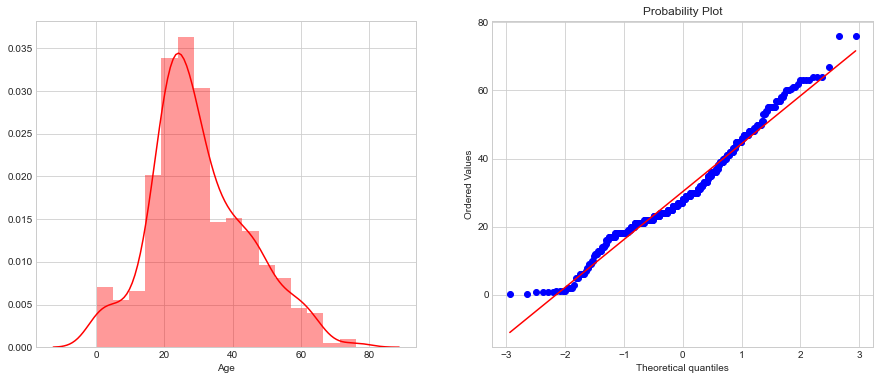

In [33]:
diagnostic_plots(df_titanic_test,'Age')
#here the data is normally distributed

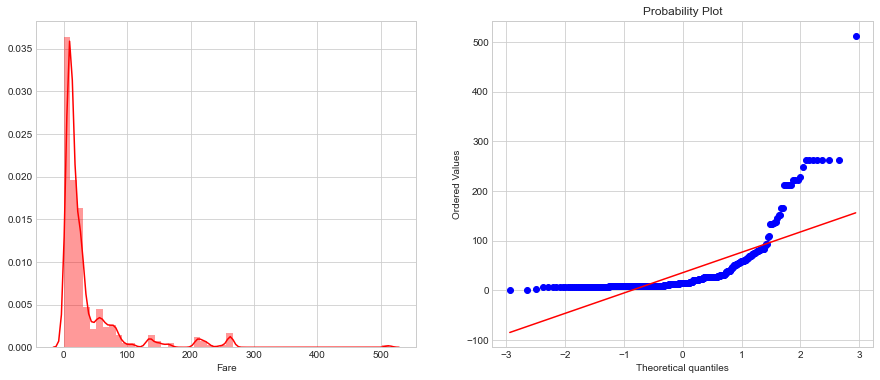

In [38]:
diagnostic_plots(df_titanic_test,'Fare')

Since its left skewed, we will try to make it normally distributed

Log Transformation

<ipython-input-37-a5fe8f276f1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['Log_fare']=np.log(df_titanic_test['Fare']+1)


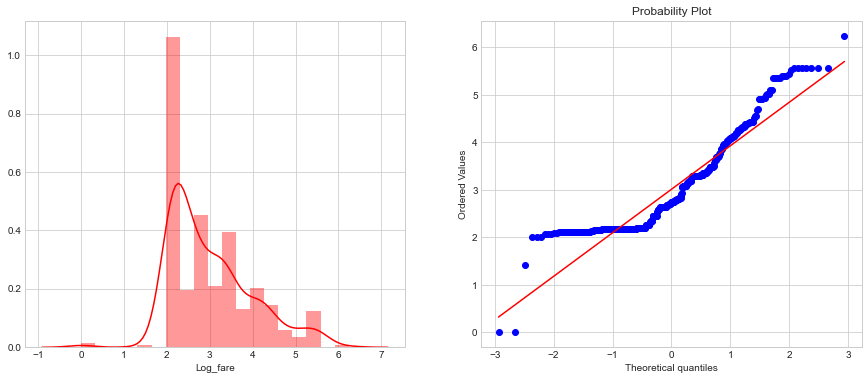

In [37]:

df_titanic_test['Log_fare']=np.log(df_titanic_test['Fare']+1)
diagnostic_plots(df_titanic_test,'Log_fare')

the log distribution does a good job in making "Fare" variable look gaussian distributed

Reciprocal transformation

<ipython-input-40-91971844fb49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['fare_rec']=1/(df_titanic_test['Fare']+1)


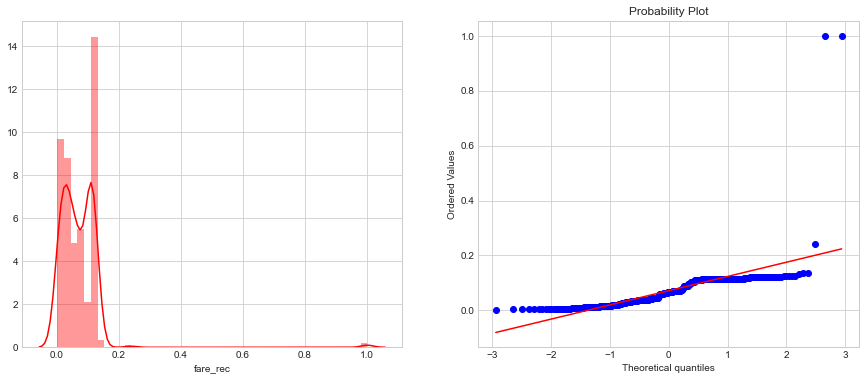

In [40]:
df_titanic_test['fare_rec']=1/(df_titanic_test['Fare']+1)
diagnostic_plots(df_titanic_test,'fare_rec')

Square Root Transformation

<ipython-input-43-d0cccc9cc833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['sqr_fare']=df_titanic_test['Fare']**(1/2)


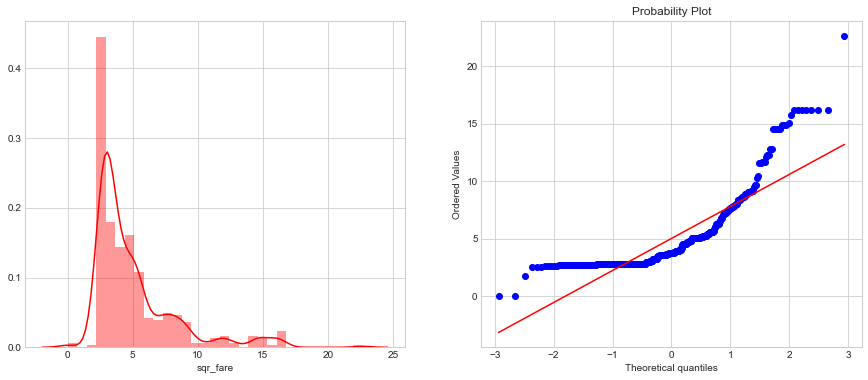

In [43]:
df_titanic_test['sqr_fare']=df_titanic_test['Fare']**(1/2)
diagnostic_plots(df_titanic_test,'sqr_fare')

Exponential Transformation

<ipython-input-44-ca65dfc4489d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['exp_fare']=df_titanic_test['Fare']**(1/5)


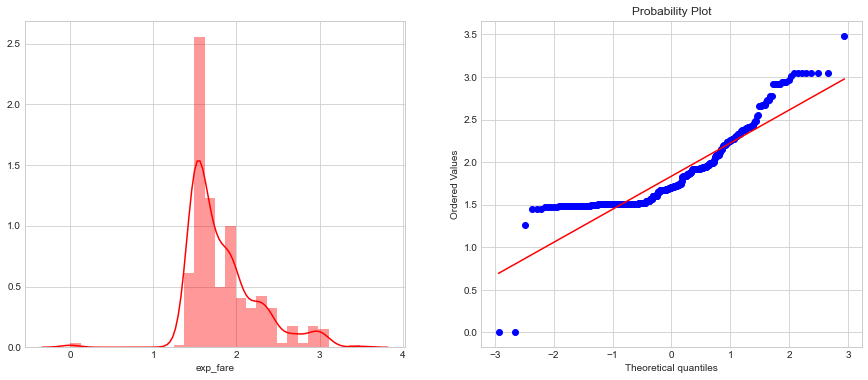

In [44]:
df_titanic_test['exp_fare']=df_titanic_test['Fare']**(1/5)
diagnostic_plots(df_titanic_test,'exp_fare')

BoxCox Transformation

<ipython-input-45-0851a2befff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_test['Fare_boxcox'],param = stats.boxcox(df_titanic_test['Fare']+1)


Optional Lambda: -0.28367556145974393


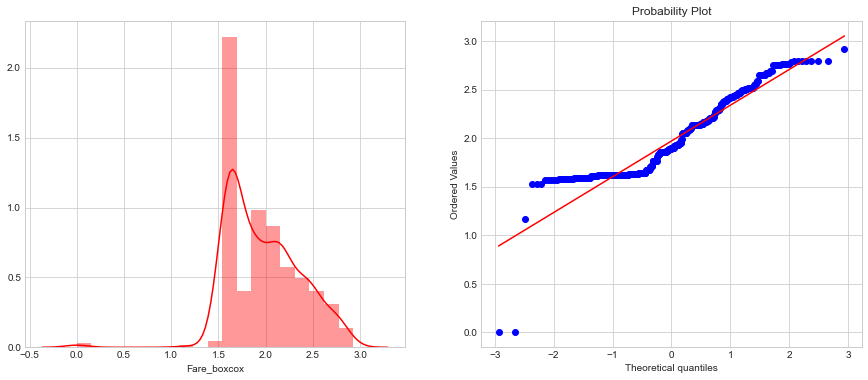

In [45]:
df_titanic_test['Fare_boxcox'],param = stats.boxcox(df_titanic_test['Fare']+1)
print('Optional Lambda:',param)
diagnostic_plots(df_titanic_test,'Fare_boxcox')